# Data Generation Example
## Blood Pressure

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

#### This function labels the blood pressure data according to the American Heart Association and Mayo Clinic guidelines
- https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
- https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465

In [2]:
# Labels
# 1 - Normal, 2. Elevated, 3. High Blood Pressure (Hypertension Stage 1),
# 4. High Blood Pressure (Hypertension Stage 2), 5. Hypertensive Crisis
# Translation
# label_dict = {0:'Hypotension - LOW',1:'Normal',2:'Elevated',3:'Hypertension S1',4:'Hypertension S2',5:'Emergency',-1:'Error'}


def label_bp(list_of_systolic_values, list_of_diastolic_values,):
    labeled_values = []
    for i in range(len(list_of_systolic_values)):
        
        if list_of_systolic_values[i] >= 180 or list_of_diastolic_values[i] >= 120:
            labeled_values.append(5)

        elif list_of_systolic_values[i] >= 140 or list_of_diastolic_values[i] >= 90:
            labeled_values.append(4)
            
        elif 130 <= list_of_systolic_values[i] <= 139 or 80 <= list_of_diastolic_values[i] <= 89:
            labeled_values.append(3)
            
        elif 120 <= list_of_systolic_values[i] <= 129 and list_of_diastolic_values[i] < 80:
            labeled_values.append(2)
            
        elif list_of_systolic_values[i] < 120 and list_of_diastolic_values[i] < 80:
            labeled_values.append(1)
            
        elif list_of_systolic_values[i] < 90 and list_of_diastolic_values[i] < 60:
            labeled_values.append(0)
            
        else:
            labeled_values.append(-1)
            
    return labeled_values

### Population distributions for systolic and diastolic blood pressure are generated and labeled using the label_bp function
- loc is the mean value
- scale is the standard deviation value

In [3]:
diastolic_75 = np.random.normal(loc=75,scale=4,size=10000).round()
systolic_120 = np.random.normal(loc=120,scale=9,size=10000).round()
label = label_bp(systolic_120,diastolic_75)

### The above data is loaded into a Pandas Dataframe 

In [4]:
df = pd.DataFrame({'Systolic':systolic_120,'Diastolic':diastolic_75, 'Label':label})

### Frequency distributions for the popluation distributions are generated

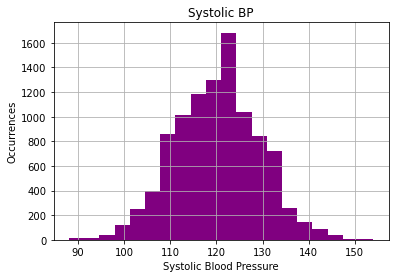

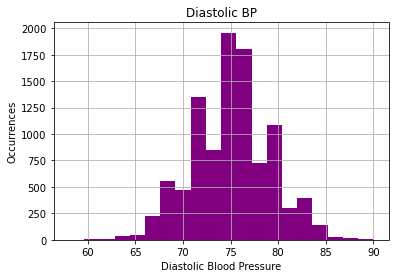

In [5]:
for i in ['Systolic','Diastolic']:
    fig, ax = plt.subplots()
    df.hist(f'{i}', ax=ax,color='purple',bins=20)
    plt.title(f'{i} BP')
    plt.xlabel(f'{i} Blood Pressure')
    plt.ylabel(f'Occurrences')
    fig.savefig(f'population_{i.lower()}.png')


### A pie chart of the population's blood pressure labels is created

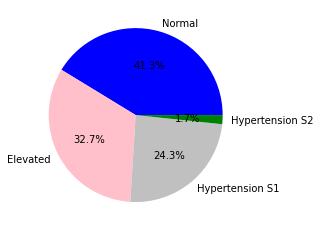

In [6]:
my_labels = {0:'Hypotension - LOW',1:'Normal',2:'Elevated',3:'Hypertension S1',4:'Hypertension S2',5:'Emergency',-1:'Error'}
my_colors = ['blue','pink','silver','green','purple','orange','red']
s = df.Label.map(my_labels).value_counts()
plt.pie(s, labels=s.index, autopct='%1.1f%%', colors=my_colors)
plt.savefig('population_pie.png')

#### Daily Values are now generated for a single random individual in the population distribution generated above

In [7]:
# A random individual's values are as follows:
single_individual = df.sample().iloc[0]
print('A random individual\'s values are as follows:')
print('Systolic:', single_individual.Systolic)
print('Diastolic:', single_individual.Diastolic)
print('Label:', my_labels[single_individual.Label])

A random individual's values are as follows:
Systolic: 106.0
Diastolic: 84.0
Label: Hypertension S1


### Individual distributions for systolic and diastolic blood pressure are generated and labeled using the label_bp function
- loc is the mean value
- scale is the standard deviation value

In [8]:
daily_diastolic = np.random.normal(loc=single_individual.Diastolic,scale=1,size=24).round()
daily_systolic = np.random.normal(loc=single_individual.Systolic,scale=3,size=24).round()
daily_labels = label_bp(daily_systolic,daily_diastolic)

### The above data is loaded into a Pandas Dataframe 

In [9]:
daily_df = pd.DataFrame({'Systolic':daily_systolic,'Diastolic':daily_diastolic, 'Label':daily_labels})

### Frequency distributions for the popluation distributions are generated

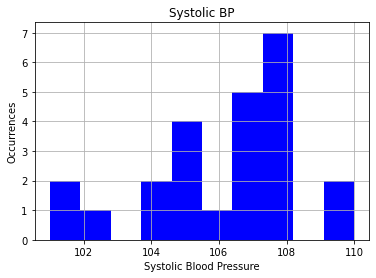

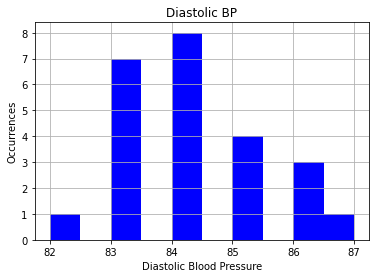

In [10]:
for i in ['Systolic','Diastolic']:
    fig, ax = plt.subplots()
    daily_df.hist(f'{i}', ax=ax,color='blue',bins=10)
    plt.title(f'{i} BP')
    plt.xlabel(f'{i} Blood Pressure')
    plt.ylabel(f'Occurrences')
    fig.savefig(f'daily_{i.lower()}.png')


### A pie chart of the individual's blood pressure labels is created

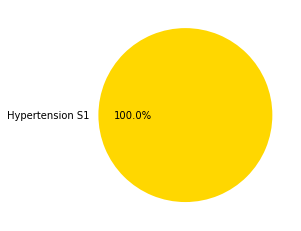

In [11]:
my_labels = {0:'Hypotension - LOW',1:'Normal',2:'Elevated',3:'Hypertension S1',4:'Hypertension S2',5:'Emergency',-1:'Error'}
my_colors = ['gold','silver','bluegreen','blue','white','navy','green']
s = daily_df.Label.map(my_labels).value_counts()
plt.pie(s, labels=s.index, autopct='%1.1f%%', colors=my_colors)
plt.savefig('daily_pie.png')

In [12]:
daily_df.to_csv('daily_distribution.csv')